# Lending Club Case Study EDA

## Analyze the data

## Data cleaning
* Remove or delete rows with null entry
* Remove outliers
* Remove unwanted rows, columns
* Check and Convert columns for correct data types
* Generate more columns that are required

## Analysis
* Data Understanding
* Perform Segmented Univariate Analysis with Graphs
* Perform Segmented Bivariate Analysiswith Graphs
* Plots correlation graph


## Understand correlations


## Observations

## Import the data

In [53]:
import warnings
warnings.filterwarnings("ignore")


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.width = 0
low_memory=False

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [301]:
df = pd.read_csv('./loan.csv')

## Analyze the data

In [302]:
print("size",df.size)
print("Shape",df.shape)


size 4408587
Shape (39717, 111)


In [303]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

## Data cleaning

In [304]:
df.loan_amnt.isnull().sum()

0

In [305]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [306]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

# Utility APIs

In [377]:
#Percentage = Value_count/Total_count * 100
#Use round function to fix decimal round(dec_val,dec_points)
def calculate_percentage(text="", key="", value="", dic=None, count=0):
    print(text)
    temp_dic={}
    for key in dic:
        #print("%s: %s"%(key, str(dic[key]/37173*100)))
        temp_dic.update({key:round(dic[key]/count*100,2)})
    df_t=pd.DataFrame(list(temp_dic.items()), columns=[key, value])
    print(df_t)
    #sns.barplot(df_t)
    


### Analyze term column

In [307]:
df.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

#### Convert Term count to int type

In [308]:
#Conver term to integer to obtain correlation with loan amount
df.term = df.term.apply(lambda x: x[:3])

In [309]:
df.term = df.term.astype('int64')

In [310]:
df.term.dtypes

dtype('int64')

### Analyze Interest rate

In [311]:
df.int_rate.value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
7.49%     656
11.71%    607
9.99%     603
7.90%     582
5.42%     573
11.99%    532
12.69%    491
10.37%    468
6.03%     447
12.99%    446
8.49%     445
12.42%    442
10.65%    435
5.79%     410
8.90%     402
7.29%     397
6.62%     396
11.86%    391
14.27%    390
10.59%    380
9.63%     378
9.91%     377
5.99%     347
7.14%     341
6.99%     336
11.11%    331
12.53%    327
16.77%    327
10.74%    312
6.54%     305
6.91%     303
8.94%     294
7.66%     292
13.61%    291
15.99%    286
13.98%    284
13.23%    263
11.12%    259
13.99%    257
6.17%     252
10.00%    251
12.68%    251
10.36%    250
10.75%    250
11.36%    247
16.49%    241
11.83%    233
18.25%    230
10.62%    228
14.65%    222
13.06%    220
10.38%    219
10.25%    218
15.23%    215
14.96%    214
16.89%    209
15.65%    208
11.14%    206
6.92%     204
17.27%    203
12.18%    203
15.27%    200
15.95%    199
16.32%    198
14.79%    192
8.00%     191
17.49%

In [312]:
#Remove % symbol to convert to float type
#df.int_rate.apply(lambda x: x[:-1]).isnull().sum()
df.int_rate = df.int_rate.apply(lambda x: x[:-1])

In [313]:
df.int_rate = df.int_rate.astype('float64')

## Analyze LC Grade and sub-grade

In [314]:
df.grade.value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

In [43]:
# grade is ordered categorical value, and can be correlated with loan_status

In [315]:
df.sub_grade.value_counts()

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

In [316]:
df.emp_title.isnull().sum()

2459

### Employment lenght is significant category for loan defaulter

In [320]:
df.emp_length.isnull().sum()

1075

In [318]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [321]:
df = df[~df.emp_length.isnull()]

In [322]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [323]:
df.emp_length.isnull().sum()

0

In [328]:
df.emp_length = df.emp_length.apply(lambda x: x.split()[0].split('+')[0] if x.split()[0].split('+')[0].isnumeric() else 0)

## Remove outlier from funded_amnt to avoid biasing the analysis

In [329]:
df.funded_amnt.isnull().sum()

0

<AxesSubplot:xlabel='funded_amnt'>

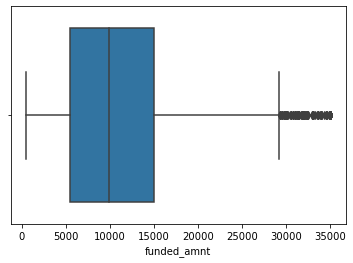

In [330]:
sns.boxplot(df.funded_amnt)

<AxesSubplot:xlabel='funded_amnt', ylabel='Count'>

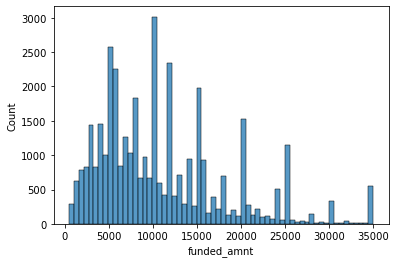

In [331]:
sns.histplot(df.funded_amnt)

In [332]:
df[df.funded_amnt > 30000]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
31     1069539    1304608      31825        31825     31825.000000    36   
128    1068159    1302729      35000        35000     35000.000000    36   
185    1067084    1301459      35000        35000     35000.000000    36   
276    1065896    1300036      35000        35000     35000.000000    36   
431    1057239    1288798      35000        35000     32763.055200    60   
609    1056174    1287750      35000        35000     35000.000000    36   
756    1059310    1291114      35000        35000     35000.000000    36   
757    1055282    1286844      35000        35000     35000.000000    36   
844    1057384    1288940      32000        32000     32000.000000    36   
866    1058952    1290751      35000        35000     34975.000000    60   
887    1058824    1290419      35000        35000     35000.000000    60   
962    1054438    1286069      35000        35000     35000.000000    36   
996    1057770    1289135      35000        35000     33906.194200    60   
1085   1056298    1287885      34475        34475     34475.000000    60   
1111   1053910    1285730      34000        34000     33975.000000    36   
1177   1054552    1286391      35000        35000     35000.000000    60   
1182   1054653    1286307      35000        35000     34975.000000    60   
1196   1050216    1281437      35000        35000     35000.000000    60   
1198   1054292    1286131      35000        35000     35000.000000    60   
1253   1053569    1285157      35000        35000     35000.000000    36   
1331   1052257    1283810      35000        35000     35000.000000    60   
1335   1051548    1283239      35000        35000     34975.000000    60   
1348   1049941    1281351      35000        35000     35000.000000    36   
1372   1047748    1278858      35000        35000     35000.000000    60   
1384   1048949    1280339      35000        35000     34975.000000    60   
1473   1050226    1281449      31000        31000     31000.000000    36   
1491   1049982    1281219      35000        35000     35000.000000    60   
1506   1049079    1280250      31300        31300     31250.000000    60   
1529   1049279    1280492      35000        35000     34950.000000    36   
1573   1048806    1279977      35000        35000     34975.000000    60   
1582   1047357    1278450      35000        35000     34960.893180    60   
1595   1048621    1279579      35000        35000     34900.000000    60   
1598   1048051    1279189      35000        35000     34925.000000    60   
1610   1048064    1279202      35000        35000     35000.000000    60   
1618   1031182    1260588      35000        35000     34961.988360    60   
1671   1047765    1278661      35000        35000     35000.000000    60   
1685   1026253    1255409      35000        35000     34975.000000    60   
1691   1047248    1278330      35000        35000     34963.330810    60   
1708   1040115    1270085      35000        35000     34950.000000    60   
1729   1046117    1277152      33600        33600     33600.000000    60   
1747   1046646    1277499      35000        35000     35000.000000    60   
1759   1023901    1252975      35000        35000     34925.000000    60   
1805   1043408    1273730      35000        35000     35000.000000    36   
1808   1045841    1276260      35000        35000     35000.000000    60   
1836   1045409    1275816      35000        35000     35000.000000    60   
1839    978527    1201574      35000        35000     34975.000000    60   
1852   1045045    1275442      35000        35000     34957.175890    60   
1878   1044500    1274849      32000        32000     31975.000000    60   
1984   1042402    1265666      35000        35000     34200.000000    36   
1993   1040112    1270080      35000        35000     34975.000000    36   
2030   1041534    1271765      33000        33000     33000.000000    36   
2093   1040679    1224929      35000        35000     34987.

In [333]:
df[df.funded_amnt > 30000]['funded_amnt'].describe()

count      673.000000
mean     34507.689450
std       1144.339122
min      30100.000000
25%      35000.000000
50%      35000.000000
75%      35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [334]:
df[df.funded_amnt > 25000]['funded_amnt'].describe()

count     1387.000000
mean     31473.251622
std       3250.218817
min      25025.000000
25%      29000.000000
50%      30000.000000
75%      35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [335]:
#Observing high value loans as debt consolidation from the companies
#Bucketize high value loans into one category
df_high = df[df.funded_amnt >= 25000]

In [336]:
df_high.shape

(2507, 111)

In [337]:
df = df[df.funded_amnt < 25000]

In [378]:
df.shape

(36135, 51)

<AxesSubplot:xlabel='funded_amnt'>

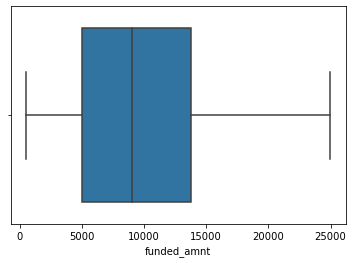

In [379]:
sns.boxplot(df.funded_amnt)

## Analyse Annual Income relation with Loan Status

In [447]:
df['annual_inc'].describe()

count    3.608800e+04
mean     6.637516e+04
std      6.181504e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.700000e+04
75%      8.000000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

### Analyze upto 80K annual income anythign > 80K are classified as high income profiles

# Note: Remove high annual income profiles to avoid biasing

In [457]:
df[df['annual_inc']>80000].shape

(8608, 53)

In [458]:
df.shape

(36088, 53)

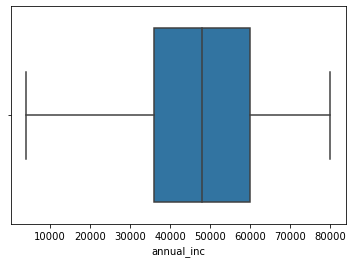

In [454]:
sns.boxplot(df[df['annual_inc']<80000]['annual_inc'])
plt.show()
#sns.histplot(df['annual_inc'])

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

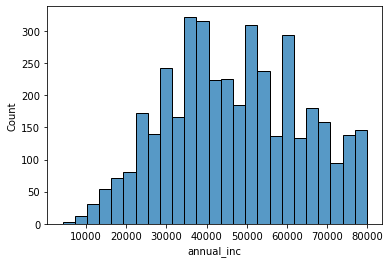

In [456]:
sns.histplot(df[(df['loan_status'] == "Charged Off") & (df['annual_inc'] <= 80000)]['annual_inc'])

In [459]:
df[df.annual_inc <= 80000].shape

(27480, 53)

## Enable below code to remove annul income outliers

In [459]:
#df = df[df.annual_inc <= 80000]

(27480, 53)

In [340]:
df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.613500e+04  3.613500e+04  36135.000000  36135.000000   
mean   6.747493e+05  8.398083e+05  10083.684101   9798.517365   
std    2.107341e+05  2.667528e+05   5991.349533   5596.133260   
min    5.574200e+04  7.069900e+04    500.000000    500.000000   
25%    5.086370e+05  6.555620e+05   5000.000000   5000.000000   
50%    6.533640e+05  8.351950e+05   9000.000000   9000.000000   
75%    8.282475e+05  1.036430e+06  14000.000000  13812.500000   
max    1.077501e+06  1.314167e+06  35000.000000  24975.000000   

       funded_amnt_inv          term      int_rate   installment  \
count     36135.000000  36135.000000  36135.000000  36135.000000   
mean       9298.467341     41.901204     11.848419    293.494509   
std        5592.763290     10.334778      3.621280    167.355646   
min           0.000000     36.000000      5.420000     15.690000   
25%        4984.803864     36.000000      8.940000    163.080000   
50%        8200.000000     36.000000     11.710000    266.830000   
75%       12900.000000     36.000000     14.270000    392.810000   
max       24975.000000     60.000000     24.590000    904.170000   

         annual_inc           dti   delinq_2yrs  inq_last_6mths  \
count  3.613500e+04  36135.000000  36135.000000     36135.00000   
mean   6.634855e+04     13.306185      0.148443         0.86448   
std    6.182276e+04      6.679838      0.497510         1.05884   
min    4.000000e+03      0.000000      0.000000         0.00000   
25%    4.000000e+04      8.160000      0.000000         0.00000   
50%    5.700000e+04     13.380000      0.000000         1.00000   
75%    8.000000e+04     18.600000      0.000000         1.00000   
max    6.000000e+06     29.990000     11.000000         8.00000   

       mths_since_last_delinq  mths_since_last_record      open_acc  \
count            12962.000000             2576.000000  36135.000000   
mean                35.879648               68.729037      9.219123   
std                 21.971905               44.071111      4.379785   
min                  0.000000                0.000000      2.000000   
25%                 18.000000               11.750000      6.000000   
50%                 34.000000               89.000000      8.000000   
75%                 52.000000              104.000000     12.000000   
max                120.000000              129.000000     44.000000   

            pub_rec      revol_bal     total_acc     out_prncp  out_prncp_inv  \
count  36135.000000   36135.000000  36135.000000  36135.000000   36135.000000   
mean       0.055431   12608.428643     21.691850     35.708284      35.547818   
std        0.238186   15016.356240     11.277092    270.953252     269.974910   
min        0.000000       0.000000      2.000000      0.000000       0.000000   
25%        0.000000    3573.500000     13.000000      0.000000       0.000000   
50%        0.000000    8495.000000     20.000000      0.000000       0.000000   
75%        0.000000   16093.500000     28.000000      0.000000       0.000000   
max        4.000000  149527.000000     90.000000   4337.790000    4337.790000   

        total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count  36135.000000     36135.000000     36135.000000   36135.000000   
mean   10841.462681     10306.444208      8843.366380    1922.664745   
std     7056.534698      7022.801664      5661.862772    1958.457560   
min        0.000000         0.000000         0.000000       0.000000   
25%     5458.885774      4954.350000      4496.655000     635.500000   
50%     9372.925505      8812.350000      8000.000000    1261.810000   
75%    15077.805670     14443.805000     12000.000000    2498.700000   
max    39175.462470     38767.460000     24975.000000   15569.950000   

       total_rec_late_fee    recoveries  collection_recovery_fee  \
count        36135.000000  36135.000000             36135.000000   
mean             1.294377     74.137265                 9.6

In [344]:
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          1313
emp_length                            0
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              11694
purpose                               0
title                                10
zip_code                              0
addr_state                            0
dti                                   0


In [345]:
df.tot_cur_bal.value_counts()

Series([], Name: tot_cur_bal, dtype: int64)

### Drop columns which are null

In [346]:
df.columns[df.isnull().sum(axis=0) == 36135]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

### Drop columns which are empty

In [347]:
df = df.drop(df.columns[df.isnull().sum(axis=0) == 36135], axis=1)

In [348]:
df.shape

(36135, 57)

In [349]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      1313
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          11694
purpose                           0
title                            10
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### Drop columns as not useful 'mths_since_last_delinq','mths_since_last_record','next_pymnt_d'

In [350]:
df = df.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'], axis=1)

In [351]:
df.shape

(36135, 54)

In [352]:
df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.613500e+04  3.613500e+04  36135.000000  36135.000000   
mean   6.747493e+05  8.398083e+05  10083.684101   9798.517365   
std    2.107341e+05  2.667528e+05   5991.349533   5596.133260   
min    5.574200e+04  7.069900e+04    500.000000    500.000000   
25%    5.086370e+05  6.555620e+05   5000.000000   5000.000000   
50%    6.533640e+05  8.351950e+05   9000.000000   9000.000000   
75%    8.282475e+05  1.036430e+06  14000.000000  13812.500000   
max    1.077501e+06  1.314167e+06  35000.000000  24975.000000   

       funded_amnt_inv          term      int_rate   installment  \
count     36135.000000  36135.000000  36135.000000  36135.000000   
mean       9298.467341     41.901204     11.848419    293.494509   
std        5592.763290     10.334778      3.621280    167.355646   
min           0.000000     36.000000      5.420000     15.690000   
25%        4984.803864     36.000000      8.940000    163.080000   
50%        8200.000000     36.000000     11.710000    266.830000   
75%       12900.000000     36.000000     14.270000    392.810000   
max       24975.000000     60.000000     24.590000    904.170000   

         annual_inc           dti   delinq_2yrs  inq_last_6mths      open_acc  \
count  3.613500e+04  36135.000000  36135.000000     36135.00000  36135.000000   
mean   6.634855e+04     13.306185      0.148443         0.86448      9.219123   
std    6.182276e+04      6.679838      0.497510         1.05884      4.379785   
min    4.000000e+03      0.000000      0.000000         0.00000      2.000000   
25%    4.000000e+04      8.160000      0.000000         0.00000      6.000000   
50%    5.700000e+04     13.380000      0.000000         1.00000      8.000000   
75%    8.000000e+04     18.600000      0.000000         1.00000     12.000000   
max    6.000000e+06     29.990000     11.000000         8.00000     44.000000   

            pub_rec      revol_bal     total_acc     out_prncp  out_prncp_inv  \
count  36135.000000   36135.000000  36135.000000  36135.000000   36135.000000   
mean       0.055431   12608.428643     21.691850     35.708284      35.547818   
std        0.238186   15016.356240     11.277092    270.953252     269.974910   
min        0.000000       0.000000      2.000000      0.000000       0.000000   
25%        0.000000    3573.500000     13.000000      0.000000       0.000000   
50%        0.000000    8495.000000     20.000000      0.000000       0.000000   
75%        0.000000   16093.500000     28.000000      0.000000       0.000000   
max        4.000000  149527.000000     90.000000   4337.790000    4337.790000   

        total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count  36135.000000     36135.000000     36135.000000   36135.000000   
mean   10841.462681     10306.444208      8843.366380    1922.664745   
std     7056.534698      7022.801664      5661.862772    1958.457560   
min        0.000000         0.000000         0.000000       0.000000   
25%     5458.885774      4954.350000      4496.655000     635.500000   
50%     9372.925505      8812.350000      8000.000000    1261.810000   
75%    15077.805670     14443.805000     12000.000000    2498.700000   
max    39175.462470     38767.460000     24975.000000   15569.950000   

       total_rec_late_fee    recoveries  collection_recovery_fee  \
count        36135.000000  36135.000000             36135.000000   
mean             1.294377     74.137265                 9.673053   
std              6.765270    530.537903               122.175394   
min              0.000000      0.000000                 0.000000   
25%              0.000000      0.000000                 0.000000   
50%              0.000000      0.000000                 0.000000   
75%              0.000000      0.000000                 0.000000   
max            165.690000  21810.310000              5774.800000   

       last_pymnt_amnt  collections_12_mths_ex_med  policy_code  \
count     36135.000000       

In [353]:
### Drop columns collections_12_mths_ex_med, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, tax_liens
df = df.drop(['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], axis=1)

In [354]:
df.shape

(36135, 49)

In [355]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36135 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       36135 non-null  int64  
 1   member_id                36135 non-null  int64  
 2   loan_amnt                36135 non-null  int64  
 3   funded_amnt              36135 non-null  int64  
 4   funded_amnt_inv          36135 non-null  float64
 5   term                     36135 non-null  int64  
 6   int_rate                 36135 non-null  float64
 7   installment              36135 non-null  float64
 8   grade                    36135 non-null  object 
 9   sub_grade                36135 non-null  object 
 10  emp_title                34822 non-null  object 
 11  emp_length               36135 non-null  object 
 12  home_ownership           36135 non-null  object 
 13  annual_inc               36135 non-null  float64
 14  verification_status   

In [356]:
df.member_id.value_counts().sum()

36135

In [357]:
df[['addr_state']].value_counts()

addr_state
CA            6492
NY            3482
FL            2612
TX            2468
NJ            1678
PA            1398
IL            1391
VA            1283
GA            1263
MA            1215
OH            1117
MD             953
AZ             783
WA             764
CO             711
NC             702
CT             681
MI             636
MO             631
MN             570
NV             449
SC             436
WI             418
OR             416
AL             403
LA             401
KY             300
OK             271
KS             240
UT             226
AR             224
DC             193
RI             191
NM             176
HI             159
WV             155
NH             146
DE             107
MT              76
WY              73
AK              71
SD              60
VT              53
MS              19
TN              16
IN               8
NE               5
ID               5
IA               5
ME               3
dtype: int64

In [358]:
df.application_type.value_counts()

INDIVIDUAL    36135
Name: application_type, dtype: int64

In [359]:
df.policy_code.value_counts()

1    36135
Name: policy_code, dtype: int64

In [360]:
df.pub_rec_bankruptcies.value_counts()

0.0    33945
1.0     1518
2.0        6
Name: pub_rec_bankruptcies, dtype: int64

In [361]:
df.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int64
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
url                         object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc            

# Loan Data Analyis using Univariate, Bivariate and Segmented

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

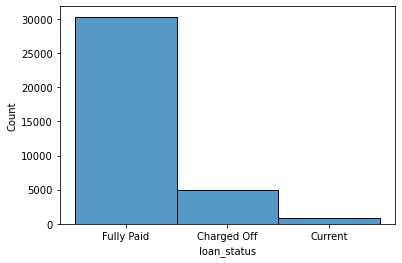

In [362]:
sns.histplot(df['loan_status'])

## Analyze based on funded_amnt

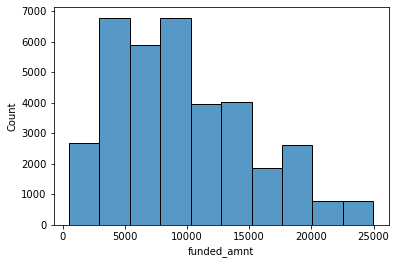

In [387]:
#df.funded_amnt.value_counts().plot.bar()
sns.histplot(df.funded_amnt,bins=10)
plt.show()

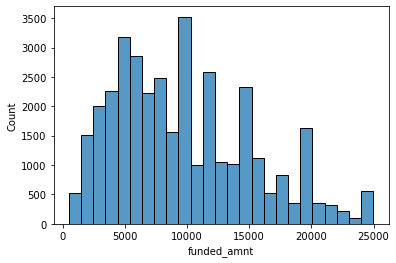

In [394]:
#df.funded_amnt.value_counts().plot.bar()
sns.histplot(df.funded_amnt,bins=25)
plt.show()

In [397]:
#df['funded_amnt_bin'] = pd.qcut(df.funded_amnt, q=[]
df['funded_amnt_bin'] = df.funded_amnt.apply(lambda x: x/1000)

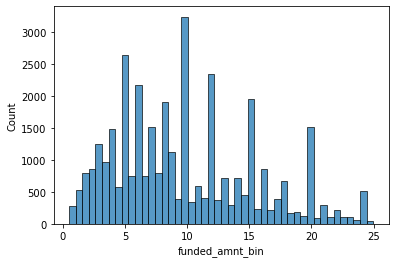

In [398]:
#df.funded_amnt.value_counts().plot.bar()
sns.histplot(df.funded_amnt_bin)
plt.show()

<AxesSubplot:xlabel='funded_amnt', ylabel='Count'>

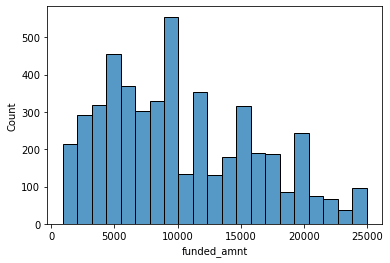

In [363]:
sns.histplot(df[df['loan_status'] == "Charged Off"]['funded_amnt'])

<AxesSubplot:xlabel='funded_amnt', ylabel='Count'>

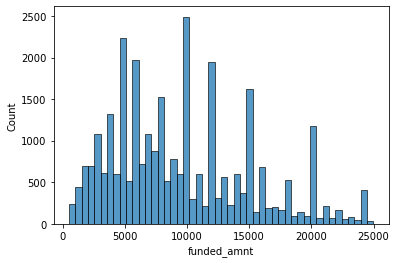

In [364]:
sns.histplot(df[df['loan_status'] == "Fully Paid"]['funded_amnt'])

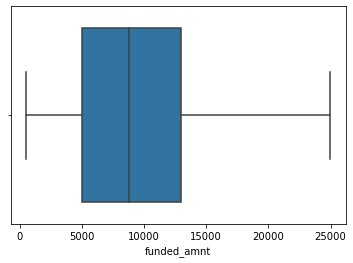

In [496]:
sns.boxplot(df[df['loan_status'] == "Fully Paid"]['funded_amnt'])
plt.show()

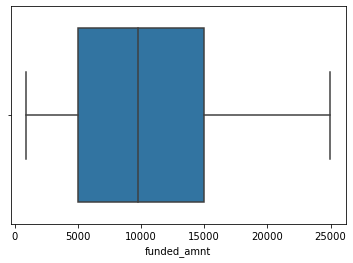

In [497]:
sns.boxplot(df[df['loan_status'] == "Charged Off"]['funded_amnt'])
plt.show()

### Analyze Loans with LC grade

In [367]:
grades={}
sub_grades = {}
weight=1
for g in ['A','B','C','D','E','F','G']:
    grades.update({g:round(weight/5)+1})
    for val in range(5):
        sub_grades.update({g+str(val+1):weight})
        weight += 1
        
print(grades)
print(sub_grades)
#df.sub_grade.apply(lambda x: )

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
{'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5, 'B1': 6, 'B2': 7, 'B3': 8, 'B4': 9, 'B5': 10, 'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 'C5': 15, 'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20, 'E1': 21, 'E2': 22, 'E3': 23, 'E4': 24, 'E5': 25, 'F1': 26, 'F2': 27, 'F3': 28, 'F4': 29, 'F5': 30, 'G1': 31, 'G2': 32, 'G3': 33, 'G4': 34, 'G5': 35}


In [368]:
df.grade.value_counts()

B    11034
A     9551
C     7496
D     4727
E     2347
F      769
G      211
Name: grade, dtype: int64

In [369]:
df['grade_int'] = df.grade.apply(lambda x: grades[x])

In [370]:
df['sub_grade_int'] = df.sub_grade.apply(lambda x: sub_grades[x])

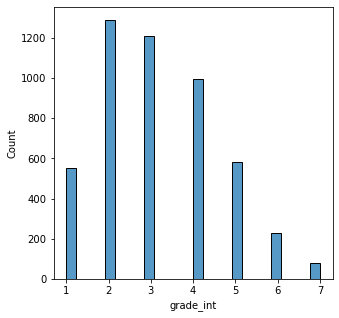

In [371]:
#sns.boxplot(df['loan_status','funded_amnt'])
#plt.show()
plt.subplots(figsize=(5,5))
sns.histplot(df[df['loan_status'] == "Charged Off"]['grade_int'])
plt.show()

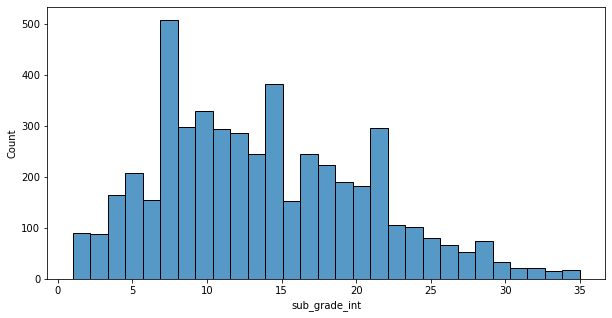

In [372]:
#sns.boxplot(df['loan_status','funded_amnt'])
#plt.show()
plt.subplots(figsize=(10,5))
sns.histplot(df[df['loan_status'] == "Charged Off"]['sub_grade_int'])
plt.show()

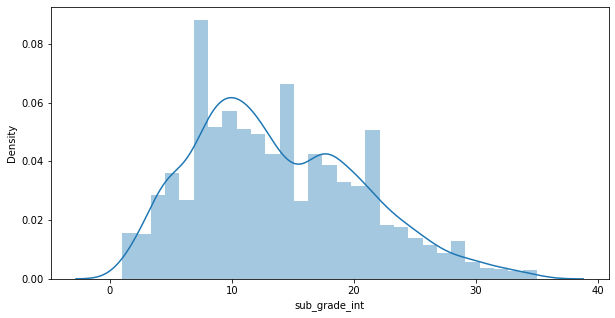

In [498]:
#sns.boxplot(df['loan_status','funded_amnt'])
#plt.show()
plt.subplots(figsize=(10,5))
sns.distplot(df[df['loan_status'] == "Charged Off"]['sub_grade_int'])
plt.show()

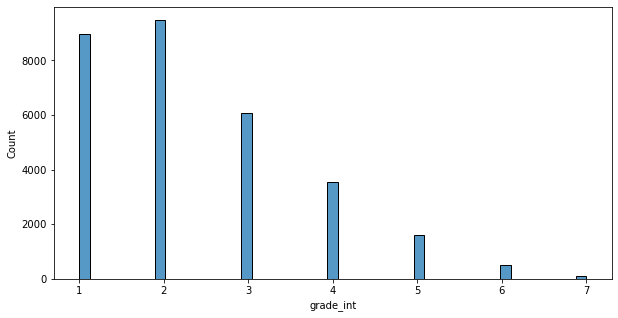

In [399]:
plt.subplots(figsize=(10,5))
sns.histplot(df[df['loan_status'] == "Fully Paid"]['grade_int'])
plt.show()

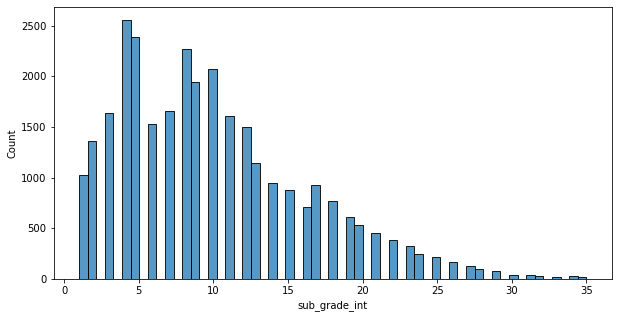

In [373]:
plt.subplots(figsize=(10,5))
sns.histplot(df[df['loan_status'] == "Fully Paid"]['sub_grade_int'])
plt.show()

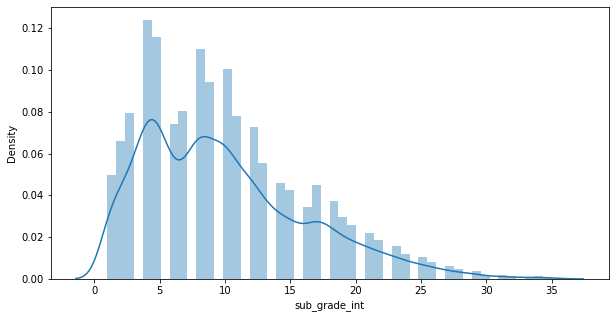

In [374]:
plt.subplots(figsize=(10,5))
sns.distplot(df[df['loan_status'] == "Fully Paid"]['sub_grade_int'])
plt.show()

## Loan with LC grade 4-12.5 (A4 - C2) Shows high paid-out
## Loand with LC grade 7-22 (B2 - D2) shows high charged-off with 

In [ ]:
sns.histplot()

<AxesSubplot:xlabel='funded_amnt'>

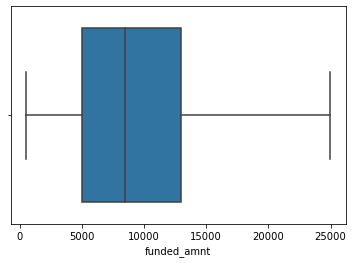

In [131]:
sns.boxplot(df[df['loan_status'] == "Fully Paid"]['funded_amnt'])

<AxesSubplot:xlabel='funded_amnt'>

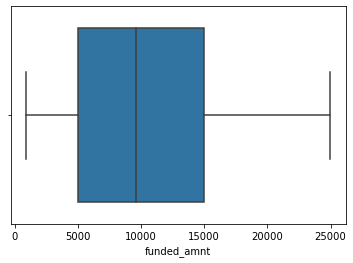

In [130]:
sns.boxplot(df[df['loan_status'] == "Charged Off"]['funded_amnt'])

## No difference against funded_amnt

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Count'>

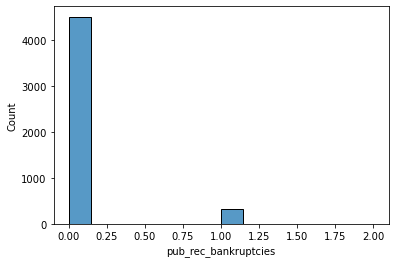

In [400]:
sns.histplot(df[df['loan_status'] == "Charged Off"]['pub_rec_bankruptcies'])

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Count'>

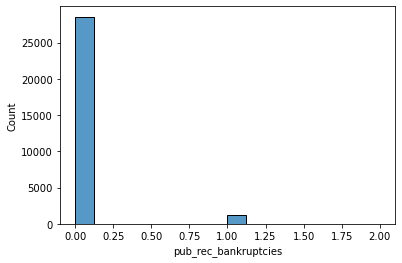

In [401]:
sns.histplot(df[df['loan_status'] == "Fully Paid"]['pub_rec_bankruptcies'])

## No difference against pub_rec_bankruptcies

In [402]:
df = df[~df.revol_util.isnull()]

In [404]:
df.revol_util.dtype

dtype('O')

In [405]:
df.revol_util.value_counts().head()

0%        887
0.20%      59
63%        57
66.70%     55
61%        55
Name: revol_util, dtype: int64

In [406]:
#Remove %age symbol
df.revol_util = df.revol_util.apply(lambda x: x[:-1])

In [407]:
df.revol_util.value_counts().head()

0        887
0.20      59
63        57
66.70     55
61        55
Name: revol_util, dtype: int64

In [408]:
df.revol_util.dtype

dtype('O')

In [409]:
df.revol_util = df.revol_util.astype('float64')

In [410]:
df.revol_util.dtype

dtype('float64')

In [411]:
#Create bins or revol_utilization
df['revol_util_bucket']=df.revol_util.apply(lambda x: x/10)

<AxesSubplot:xlabel='revol_util_bucket', ylabel='Density'>

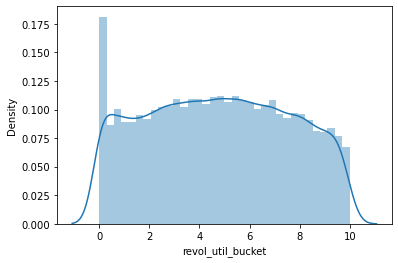

In [500]:
sns.distplot(df[df['loan_status'] == "Fully Paid"]['revol_util_bucket'])

<AxesSubplot:xlabel='revol_util_bucket', ylabel='Density'>

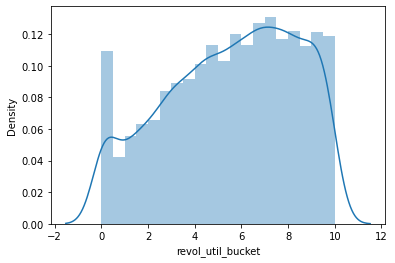

In [499]:
sns.distplot(df[df['loan_status'] == "Charged Off"]['revol_util_bucket'])

## Account with revol_util > 45% is likely to default
## Account with revol_util < 20% shows good result with <=4% excellent result

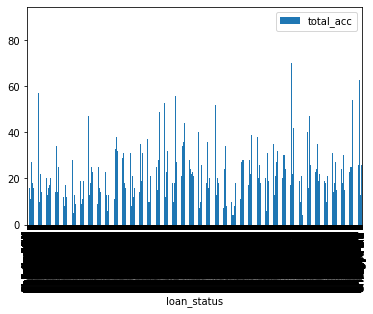

In [258]:
df.plot(x='loan_status',y='total_acc',kind="bar")
plt.show()

<AxesSubplot:xlabel='total_acc', ylabel='Count'>

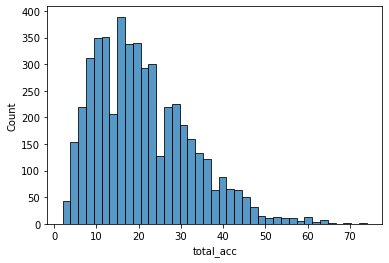

In [414]:
sns.histplot(df[df['loan_status'] == "Charged Off"]['total_acc'])

<AxesSubplot:xlabel='total_acc', ylabel='Count'>

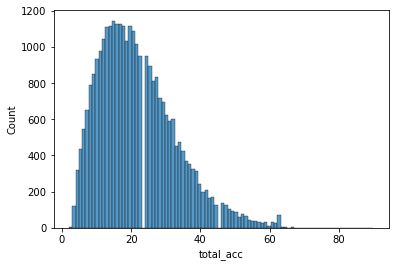

In [415]:
sns.histplot(df[df['loan_status'] == "Fully Paid"]['total_acc'])

## Loan Status with total_acc has no significance 

<AxesSubplot:xlabel='delinq_2yrs'>

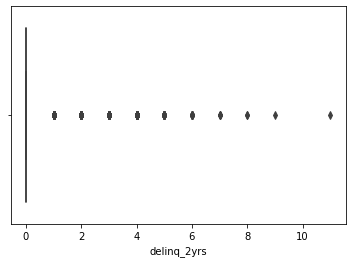

In [416]:
sns.boxplot(df['delinq_2yrs'])

In [417]:
df['application_type'].value_counts()

INDIVIDUAL    36088
Name: application_type, dtype: int64

<AxesSubplot:xlabel='delinq_2yrs', ylabel='Count'>

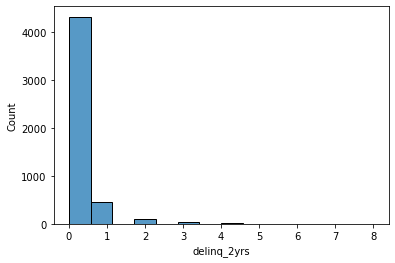

In [418]:
sns.histplot(df[df['loan_status'] == "Charged Off"]['delinq_2yrs'])

<AxesSubplot:xlabel='delinq_2yrs', ylabel='Count'>

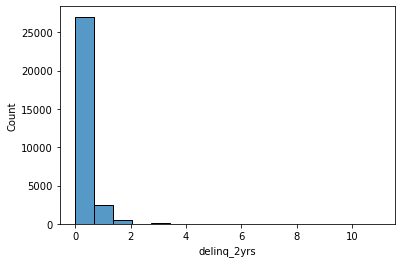

In [419]:
sns.histplot(df[df['loan_status'] == "Fully Paid"]['delinq_2yrs'])

<AxesSubplot:xlabel='dti', ylabel='Count'>

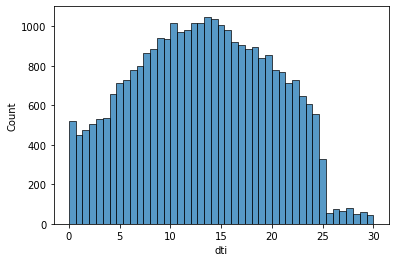

In [420]:
sns.histplot(df[df['loan_status'] == "Fully Paid"]['dti'])

<AxesSubplot:xlabel='dti', ylabel='Count'>

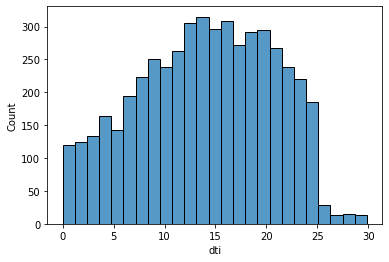

In [421]:
sns.histplot(df[df['loan_status'] == "Charged Off"]['dti'])

## Loan Status with dti shows no significance
### However dti between 12 - 20 shows high charge off

In [422]:
df['emp_length'].dtype

dtype('O')

In [423]:
df['emp_length'].isnull().sum()

0

In [424]:
df.emp_length.head()

0    10
1     0
2    10
3    10
4     1
Name: emp_length, dtype: object

In [426]:
df.emp_length = df.emp_length.astype('int32')

In [427]:
df['emp_length'].dtype

dtype('int32')

<AxesSubplot:xlabel='emp_length', ylabel='Count'>

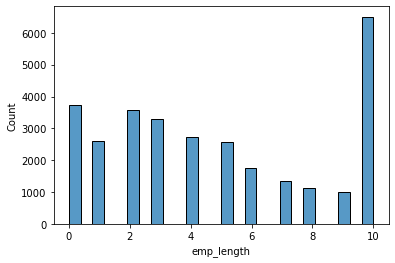

In [428]:
sns.histplot(df[df['loan_status'] == "Fully Paid"]['emp_length'])

<AxesSubplot:xlabel='emp_length', ylabel='Count'>

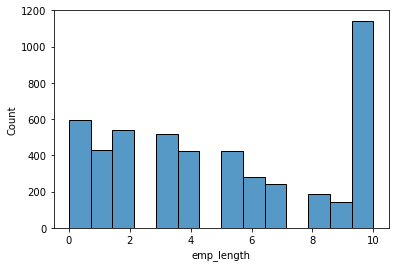

In [429]:
sns.histplot(df[df['loan_status'] == "Charged Off"]['emp_length'])

In [443]:
df[(df['loan_status']=="Fully Paid") & (df['emp_length']==10)].shape

(6504, 53)

In [433]:
df[(df['loan_status']=="Charged Off") & (df['emp_length']==10)].shape

(1143, 53)

In [476]:
def show_percentage_2val(column_name="", condition=None):
    print("%s :%s:"%(column_name, condition))
    print("Full Paid: %s"%(list(df[(df['loan_status']=="Fully Paid") & (df[column_name]==condition)].shape)[0]/list(df[(df['loan_status']=="Fully Paid")].shape)[0]*100))
    print("Charged Off: %s"%(list(df[(df['loan_status']=="Charged Off") & (df[column_name]==condition)].shape)[0]/list(df[(df['loan_status']=="Charged Off")].shape)[0]*100))

In [477]:
show_percentage_2val('emp_length', 10)

emp_length :10:
Full Paid: 21.493010805987904
Charged Off: 23.226986384881123


In [445]:
print("Employment Length 10: ")
print("Full Paid: %s"%(list(df[(df['loan_status']=="Fully Paid") & (df['emp_length']==10)].shape)[0]/list(df[(df['loan_status']=="Fully Paid")].shape)[0]*100))
print("Charged Off: %s"%(list(df[(df['loan_status']=="Charged Off") & (df['emp_length']==10)].shape)[0]/list(df[(df['loan_status']=="Charged Off")].shape)[0]*100))

Employment Length 10: 
Full Paid: 21.493010805987904
Charged Off: 23.226986384881123


## Analyse Annual Income relation with Loan Status

In [447]:
df['annual_inc'].describe()

count    3.608800e+04
mean     6.637516e+04
std      6.181504e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.700000e+04
75%      8.000000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

### Analyze upto 80K annual income anythign > 80K are classified as high income profiles

<b> Note: Remove high annual income profiles to avoid biasing (Not considered in this analysis)</b>

In [457]:
df[df['annual_inc']>80000].shape

(8608, 53)

In [458]:
df.shape

(36088, 53)

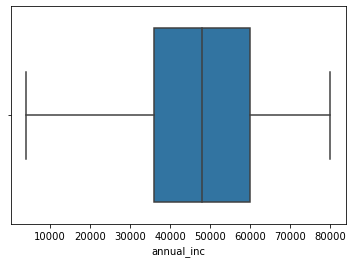

In [454]:
sns.boxplot(df[df['annual_inc']<80000]['annual_inc'])
plt.show()
#sns.histplot(df['annual_inc'])

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

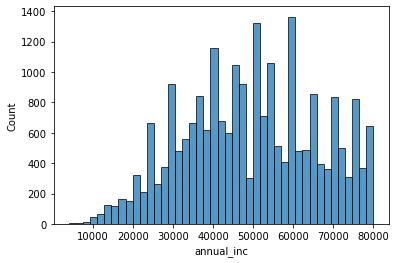

In [460]:
sns.histplot(df[(df['loan_status'] == "Fully Paid") & (df['annual_inc'] <= 80000)]['annual_inc'])

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

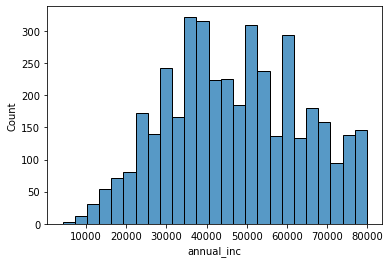

In [461]:
sns.histplot(df[(df['loan_status'] == "Charged Off") & (df['annual_inc'] <= 80000)]['annual_inc'])

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

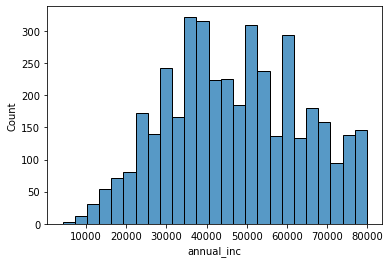

In [461]:
sns.histplot(df[(df['loan_status'] == "Charged Off") & (df['annual_inc'] <= 80000)]['annual_inc'])

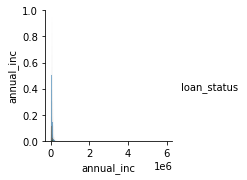

In [506]:
#plt.subplots(figsize=(10,10))
sns.pairplot(df[['loan_status','annual_inc']], hue="loan_status", diag_kind="hist")
plt.show()

In [ ]:
#plt.subplots(figsize=(10,10))
sns.pairplot(df, hue="loan_status")
#plt.show()

## Analyze loan status based on home_ownership

In [463]:
df['home_ownership'].value_counts()

RENT        17733
MORTGAGE    15557
OWN          2703
OTHER          92
NONE            3
Name: home_ownership, dtype: int64

In [464]:
df[(df['loan_status'] == "Charged Off")]['home_ownership'].value_counts()

RENT        2577
MORTGAGE    1958
OWN          369
OTHER         17
Name: home_ownership, dtype: int64

In [465]:
df[(df['loan_status'] == "Fully Paid")]['home_ownership'].value_counts()

RENT        14792
MORTGAGE    13118
OWN          2273
OTHER          75
NONE            3
Name: home_ownership, dtype: int64

In [466]:
df['verification_status'].value_counts()

Not Verified       16287
Verified           10391
Source Verified     9410
Name: verification_status, dtype: int64

In [467]:
df[(df['loan_status'] == "Charged Off")]['verification_status'].value_counts()

Not Verified       2008
Verified           1593
Source Verified    1320
Name: verification_status, dtype: int64

In [468]:
df[(df['loan_status'] == "Fully Paid")]['verification_status'].value_counts()

Not Verified       14059
Verified            8379
Source Verified     7823
Name: verification_status, dtype: int64

In [480]:
home_ownership=['RENT','MORTGAGE','OWN']

In [481]:
for val in home_ownership:
    show_percentage_2val('home_ownership', val)

home_ownership :RENT:
Full Paid: 48.88139849971911
Charged Off: 52.36740499898394
home_ownership :MORTGAGE:
Full Paid: 43.34952579227389
Charged Off: 39.788660841292426
home_ownership :OWN:
Full Paid: 7.511318198341099
Charged Off: 7.498475919528551


## Home ownership won't have significance impact on the loan_status

## Home Ownership and verification status shows no significance on loan status

In [470]:
df['term'].value_counts()

36    27206
60     8882
Name: term, dtype: int64

In [478]:
show_percentage_2val('term', 36)

term :36:
Full Paid: 80.22867717524205
Charged Off: 59.50010160536476


In [479]:
show_percentage_2val('term', 60)

term :60:
Full Paid: 19.771322824757938
Charged Off: 40.49989839463524


### Shows 3year term has highest payout
### Note should check how it is varying under different funded_amnt and annual_inc bucket

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

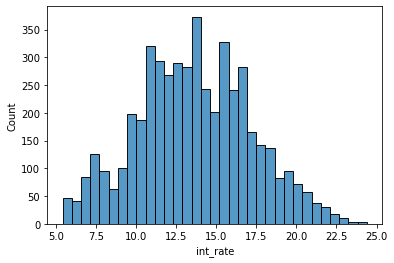

In [483]:
sns.histplot(df[(df['loan_status'] == "Charged Off")]['int_rate'])

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

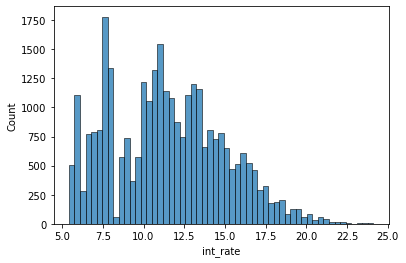

In [484]:
sns.histplot(df[(df['loan_status'] == "Fully Paid")]['int_rate'])

In [488]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'policy_code', 'application_type',
       'pub_rec_bankruptcies', 'grade_int', 'sub_grade_int', 'funded_amnt_bin',
       'revol_util_bucket'],
      dtype='object')

In [489]:
df[['annual_inc','funded_amnt','int_rate','sub_grade_int','term','total_acc','revol_util_bucket','pub_rec_bankruptcies']].head()

annual_inc  funded_amnt  int_rate  sub_grade_int  term  total_acc  \
0     24000.0         5000     10.65              7    36          9   
1     30000.0         2500     15.27             14    60          4   
2     12252.0         2400     15.96             15    36         10   
3     49200.0        10000     13.49             11    36         37   
4     80000.0         3000     12.69             10    60         38   

   revol_util_bucket  pub_rec_bankruptcies  
0               8.37                   0.0  
1               0.94                   0.0  
2               9.85                   0.0  
3               2.10                   0.0  
4               5.39                   0.0

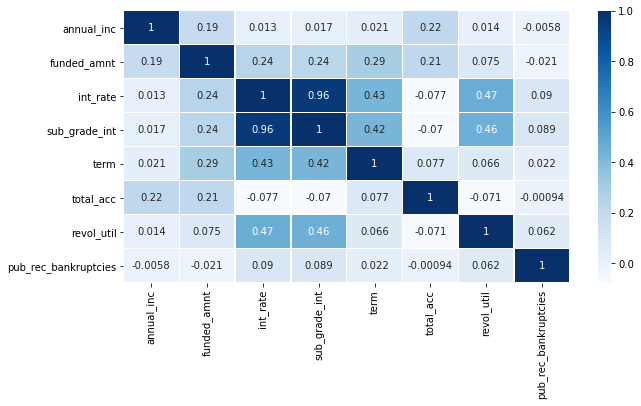

In [494]:
corr = df[['annual_inc','funded_amnt','int_rate','sub_grade_int','term','total_acc','revol_util','pub_rec_bankruptcies']].corr()
fig,ax = plt.subplots(figsize=(10,5))
sns.heatmap(corr, cmap="Blues", annot=True, linewidths=.5, ax=ax)
plt.show()

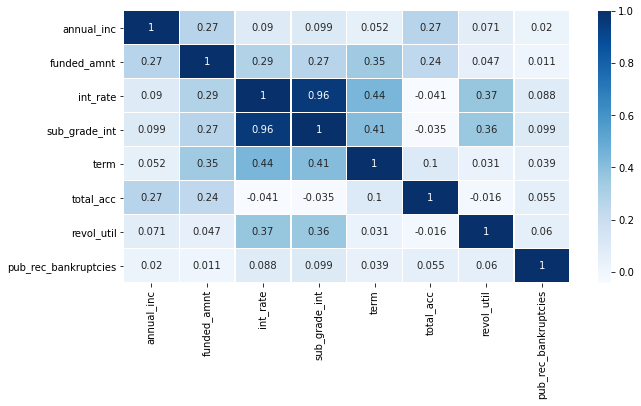

In [495]:
corr = df[df['loan_status']=="Charged Off"][['annual_inc','funded_amnt','int_rate','sub_grade_int','term','total_acc','revol_util','pub_rec_bankruptcies']].corr()
fig,ax = plt.subplots(figsize=(10,5))
sns.heatmap(corr, cmap="Blues", annot=True, linewidths=.5, ax=ax)
plt.show()

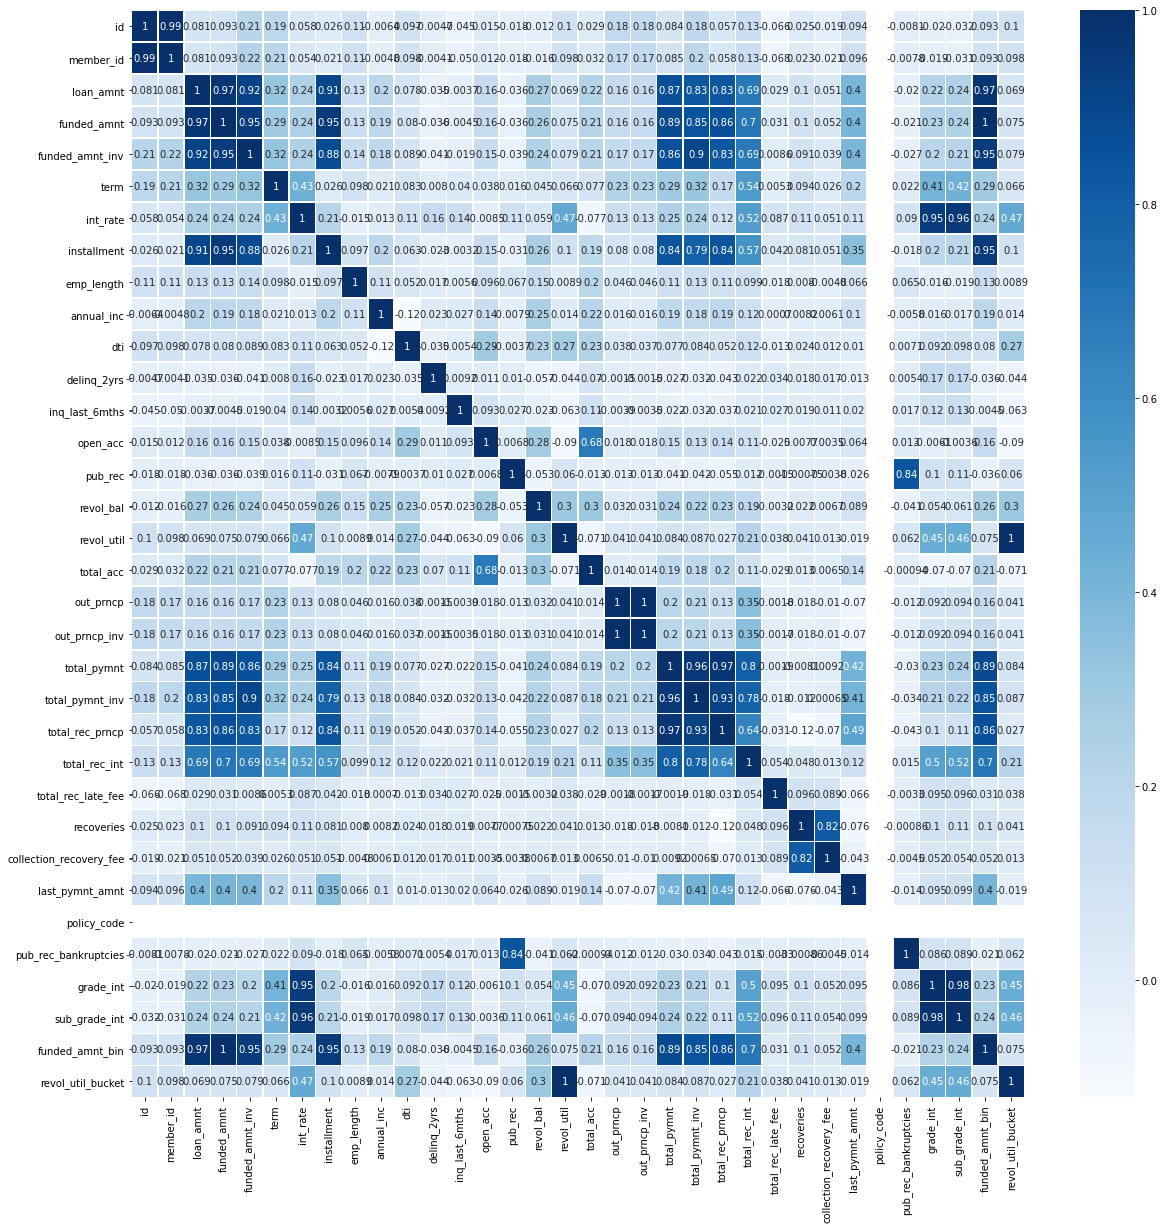

In [491]:
corr = df.corr()
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, cmap="Blues", annot=True, linewidths=.5, ax=ax)
plt.show()

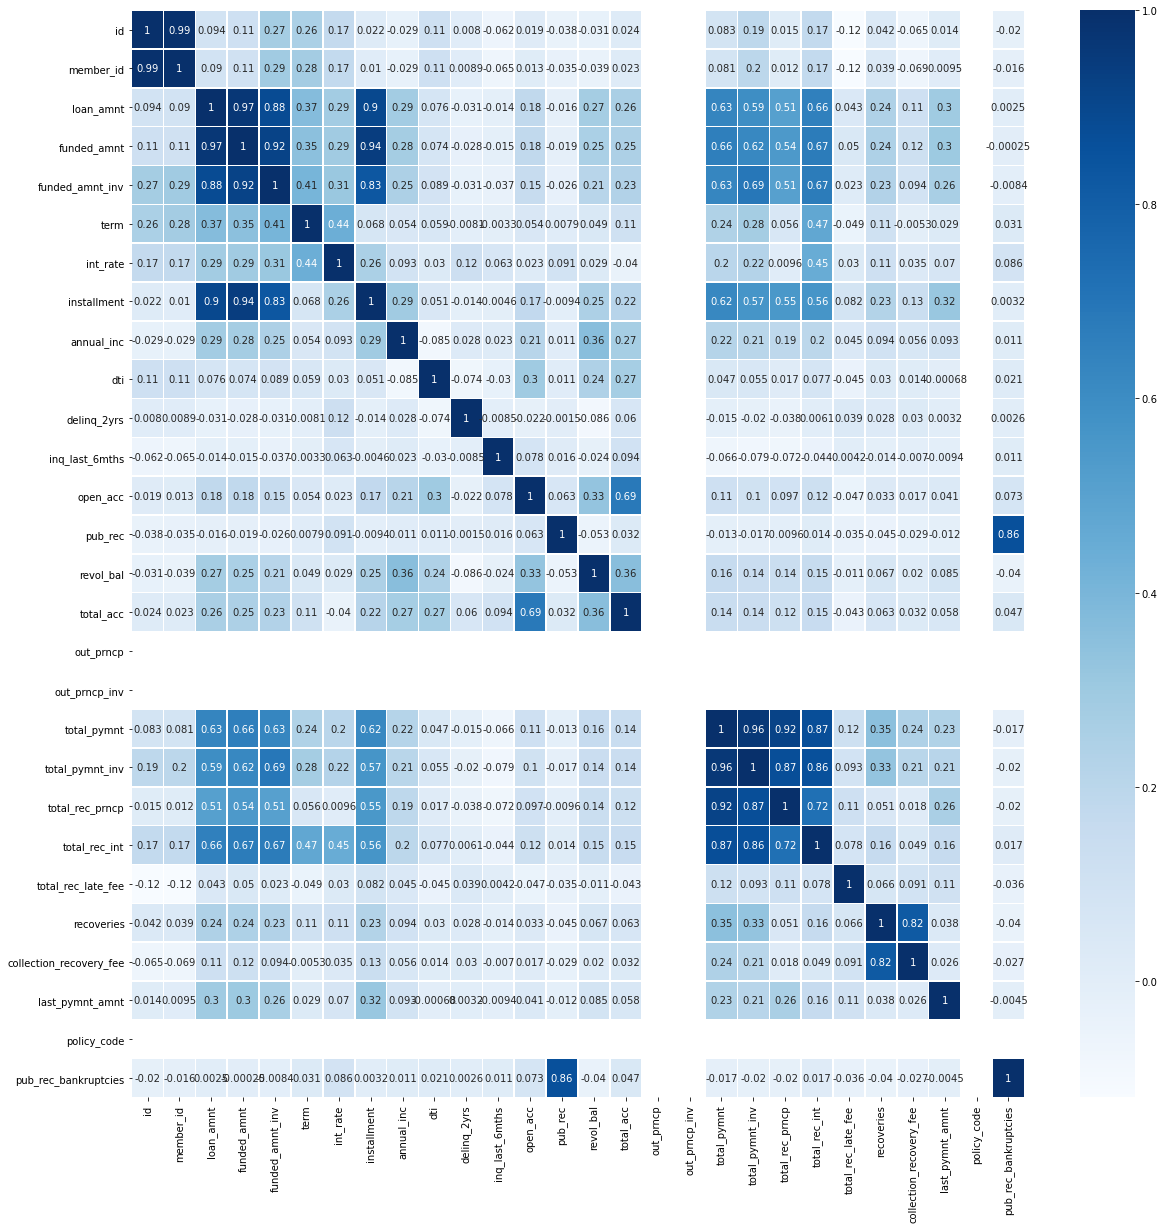

In [122]:
corr = df[df['loan_status'] == "Charged Off"].corr()
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, cmap="Blues", annot=True, linewidths=.5, ax=ax)
plt.show()

# Observations

* Loans with LC sub-grade 7-22 (B2 - D2) shows high charged-off with
* Loan accounts with revol_util > 45% is likely to default


### Backup work

In [171]:
df.shape

(37173, 51)

In [229]:
def calculate_percentage(text="", dic=None):
    print(text)
    temp_dic={}
    for key in dic:
        #print("%s: %s"%(key, str(dic[key]/37173*100)))
        temp_dic.update({key:dic[key]/37173*100})
    df_t=pd.DataFrame(list(temp_dic.items()), columns=['Key', 'Values'])
    print(df_t)
    #sns.barplot(df_t)
    


In [169]:
sub_grade_percent = dict(df[df['loan_status'] == "Fully Paid"]['sub_grade'].value_counts())
print(sub_grade_percent)

{'A4': 2625, 'A5': 2456, 'B3': 2334, 'B5': 2120, 'B4': 1983, 'B2': 1698, 'A3': 1695, 'C1': 1628, 'B1': 1583, 'C2': 1513, 'A2': 1419, 'C3': 1159, 'A1': 1109, 'C4': 967, 'D2': 942, 'C5': 901, 'D3': 786, 'D1': 722, 'D4': 612, 'D5': 548, 'E1': 462, 'E2': 385, 'E3': 335, 'E4': 250, 'E5': 215, 'F1': 165, 'F2': 125, 'F3': 94, 'F4': 81, 'F5': 41, 'G1': 37, 'G2': 27, 'G4': 25, 'G3': 18, 'G5': 15}


In [ ]:
#df[df['loan_status'] == "Fully Paid"]['sub_grade'].isnull().sum()
calculate_percentage("LoanStatus Fully Paid Sub-Grade", dict(df[df['loan_status'] == "Fully Paid"]['sub_grade'].value_counts()))

In [ ]:
#acc_now_delinq: The number of accounts on which the borrower is now delinquent.


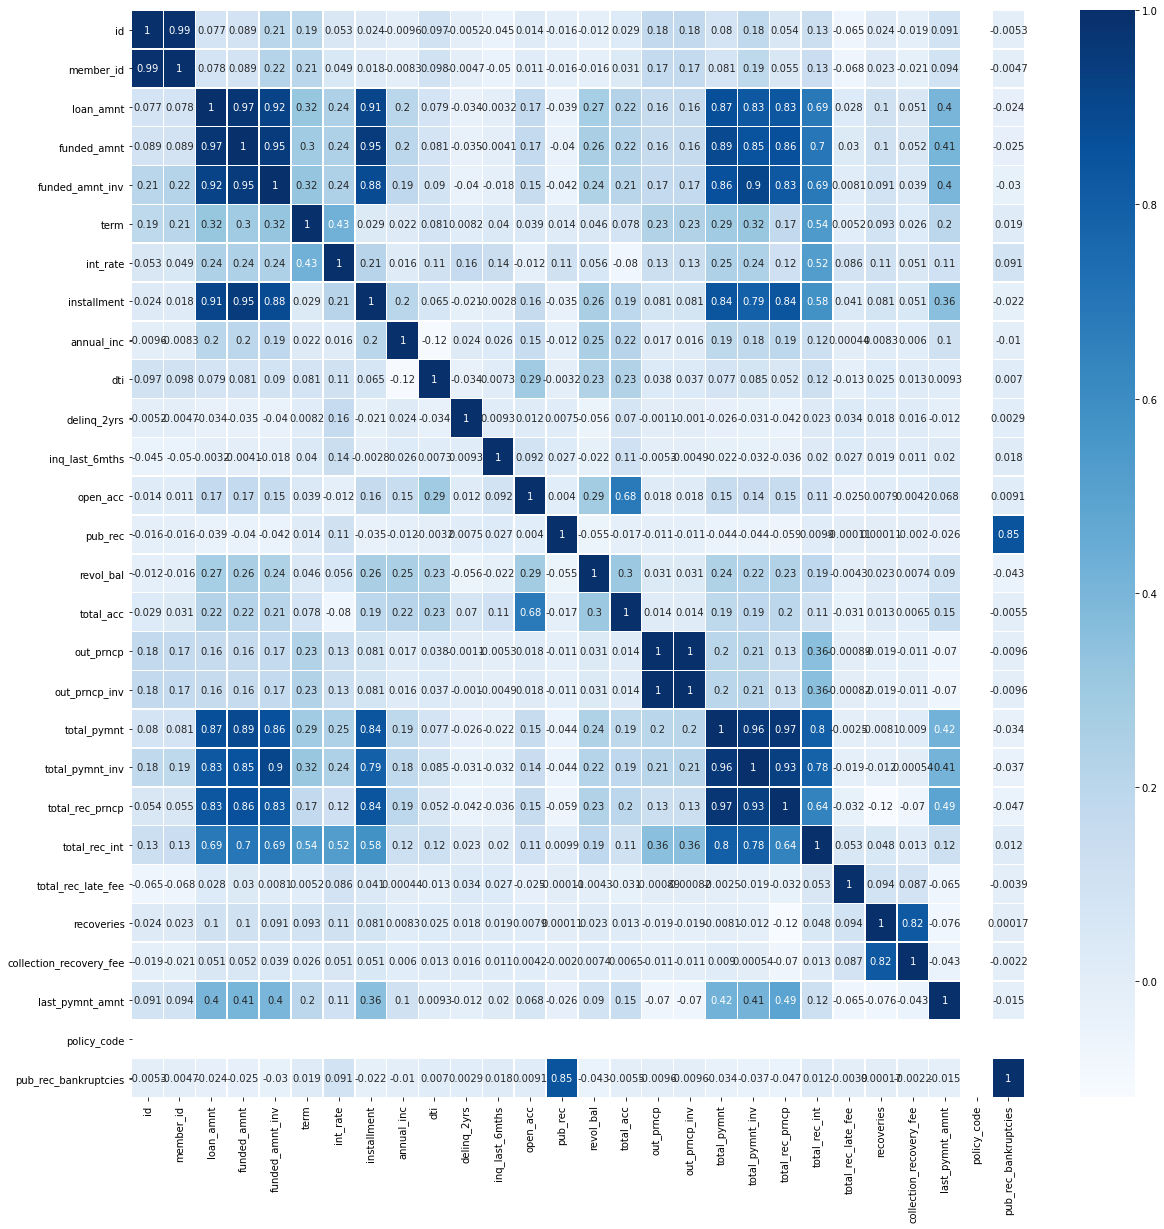

In [121]:
corr = df.corr()
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, cmap="Blues", annot=True, linewidths=.5, ax=ax)
plt.show()

### Remove outliers from funded amount

verification_status, income verified by LC


In [ ]:
df.shape

In [ ]:
df.columns